predictive-regression-modeling

In [2]:
#%reset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import os

# These are some parameters to make figures nice (and big)
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 
plt.rcParams['figure.figsize'] = 16,8
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

# Data
In this project, the data set we use is the relationship between the lithosphere-asthenosphere (LAB) depth and difference of residual topography and dynamic topography for cratons. The data on 1x1 degree nodes serve as the training data, containing 5487 points. On the other hand, the average LAB depth and topography difference for each craton are calculated. These data serve as the test data, containing 18 points, each one for an individual craton.

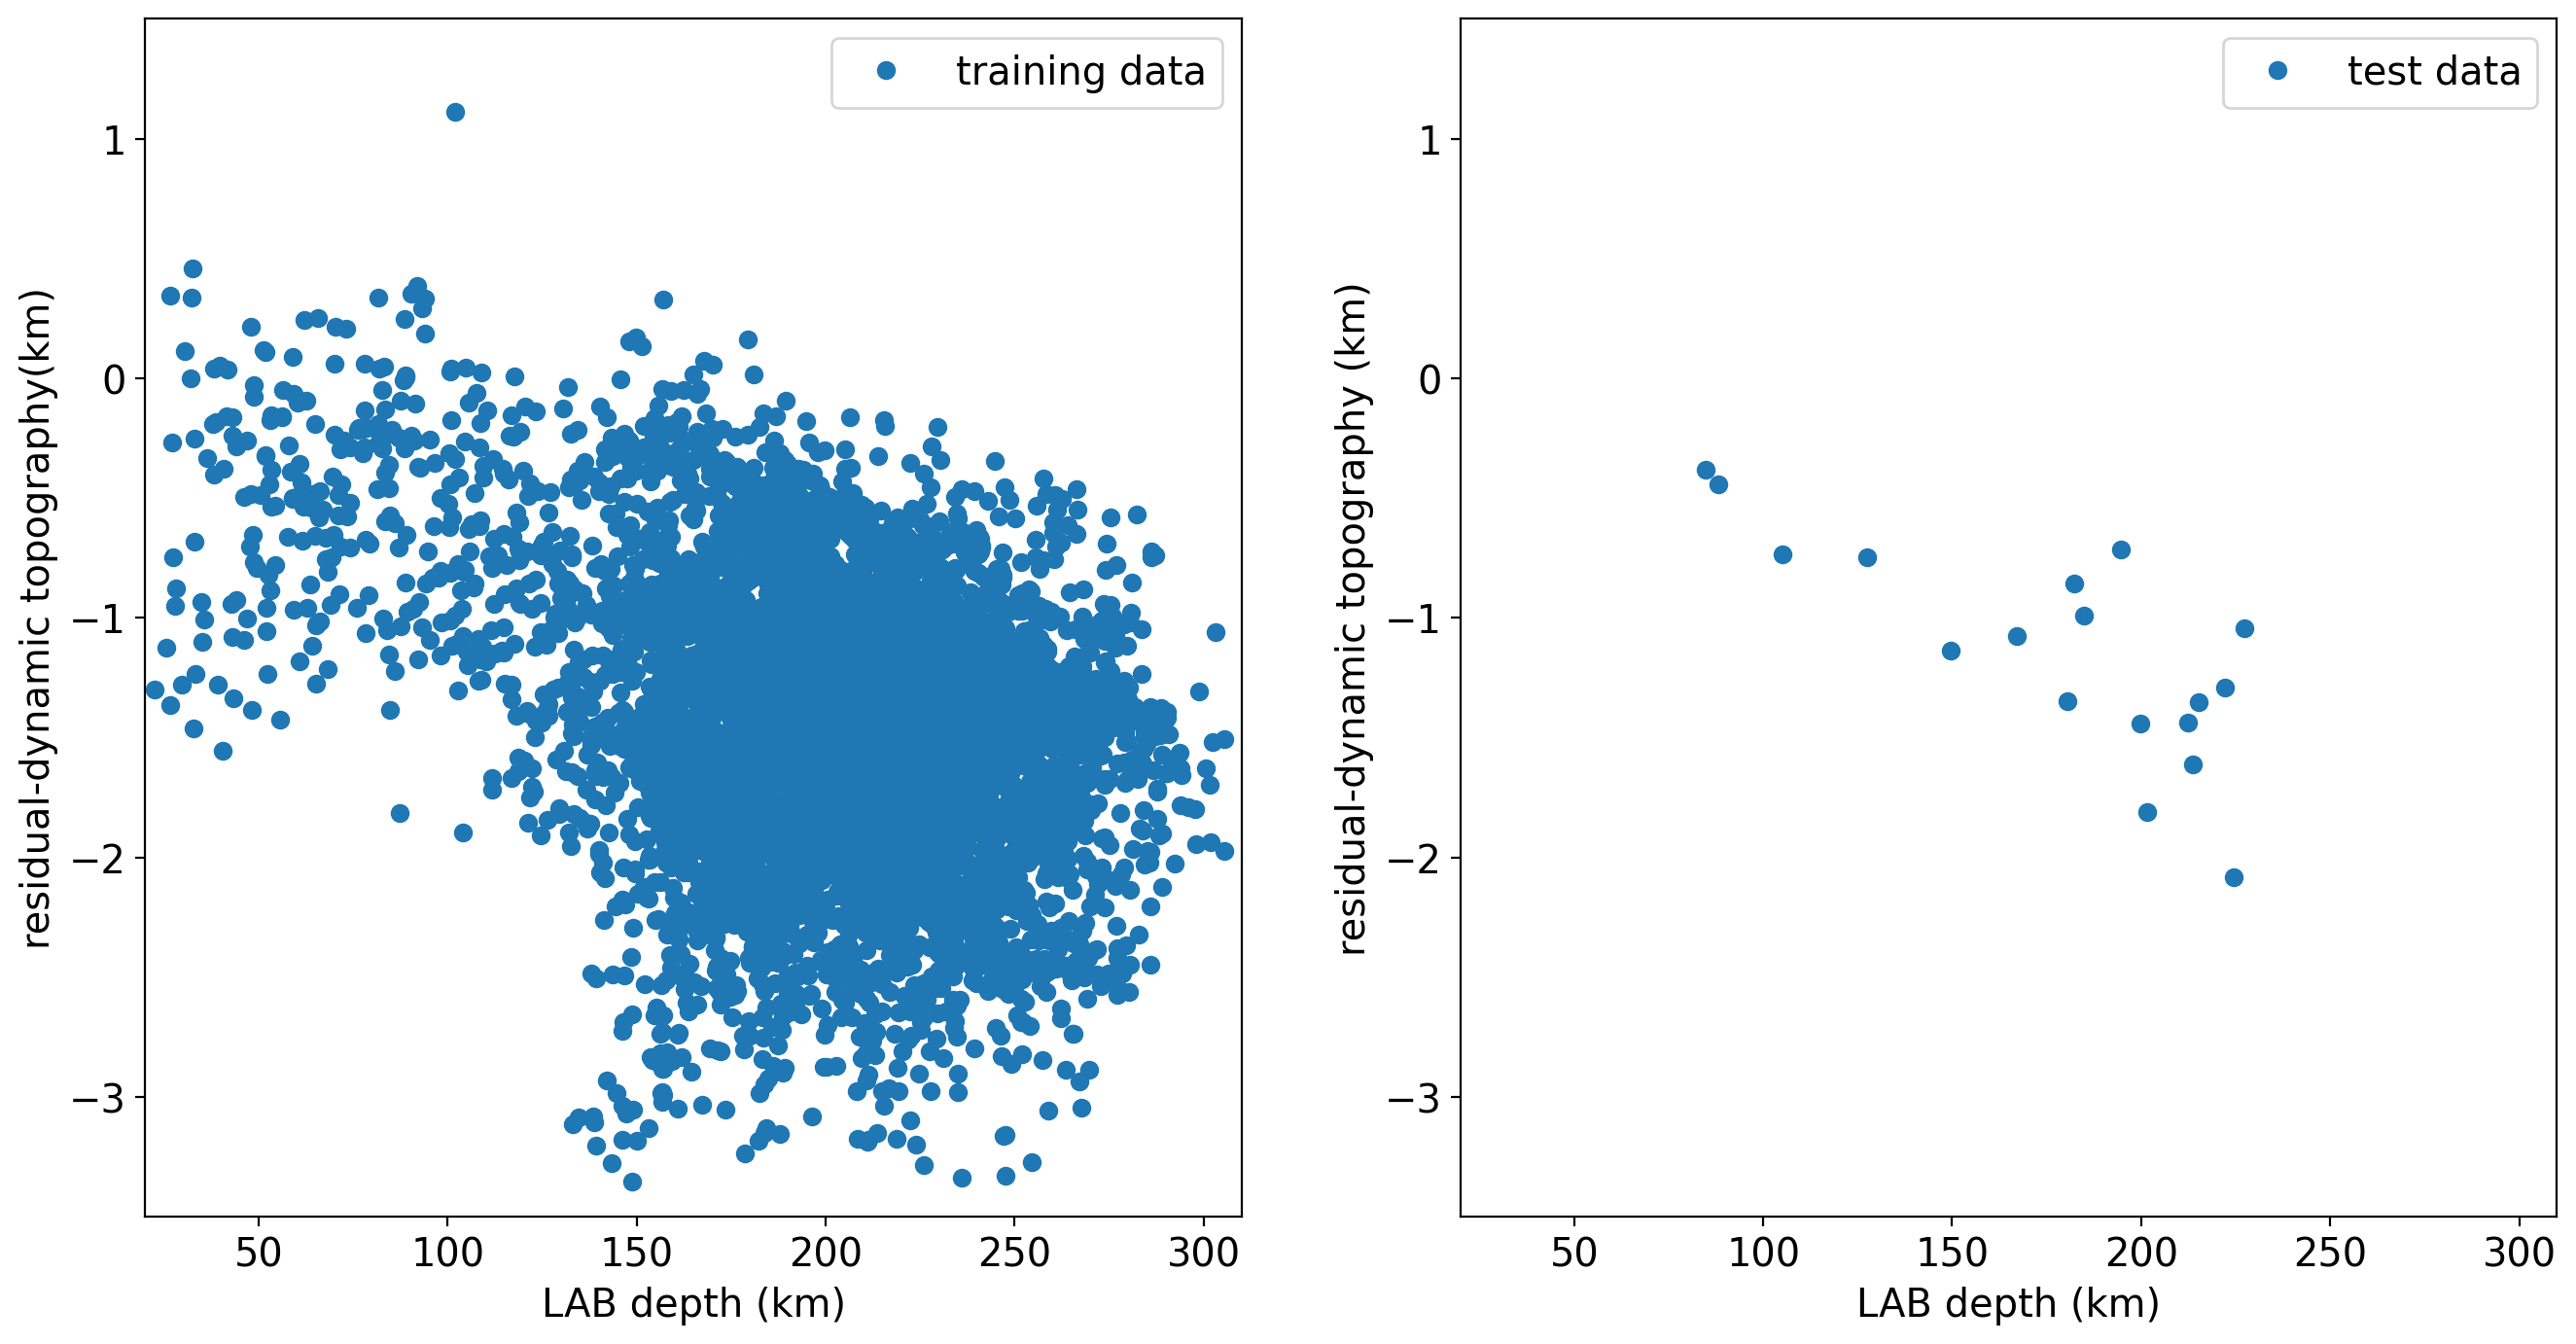

In [3]:
file_train = '../data/residual-dynamic_lab_train.txt'
file_test = '../data/residual-dynamic_lab_test.txt'
data_train = pd.read_csv(file_train,sep=' ')
data_test = pd.read_csv(file_test,sep=' ')

topo_train = pd.DataFrame(data_train['topography'])
lab_train = pd.DataFrame(data_train['LAB'])
topo_test = pd.DataFrame(data_test['topography'])
lab_test = pd.DataFrame(data_test['LAB'])

fig, ax = plt.subplots(1,2,figsize=[16,8])
ax[0].plot(lab_train,topo_train,'o',label='training data')
ax[0].set_xlim(left=20,right=310)
ax[0].set_ylim(bottom=-3.5,top=1.5)
ax[0].set_xlabel('LAB depth (km)')
ax[0].set_ylabel('residual-dynamic topography(km)')
ax[0].legend()

ax[1].plot(lab_test,topo_test,'o',label='test data')
ax[1].set_xlim(left=20,right=310)
ax[1].set_ylim(bottom=-3.5,top=1.5)
ax[1].set_xlabel('LAB depth (km)')
ax[1].set_ylabel('residual-dynamic topography (km)')
ax[1].legend()

# Simple linear regression
The LinearRegression in the scikit-learn is used for simple linear regression.

slope=[[-0.00429147]]
intercept=[-0.59347452]
Training MSE: 0.342390
Test MSE: 0.147106


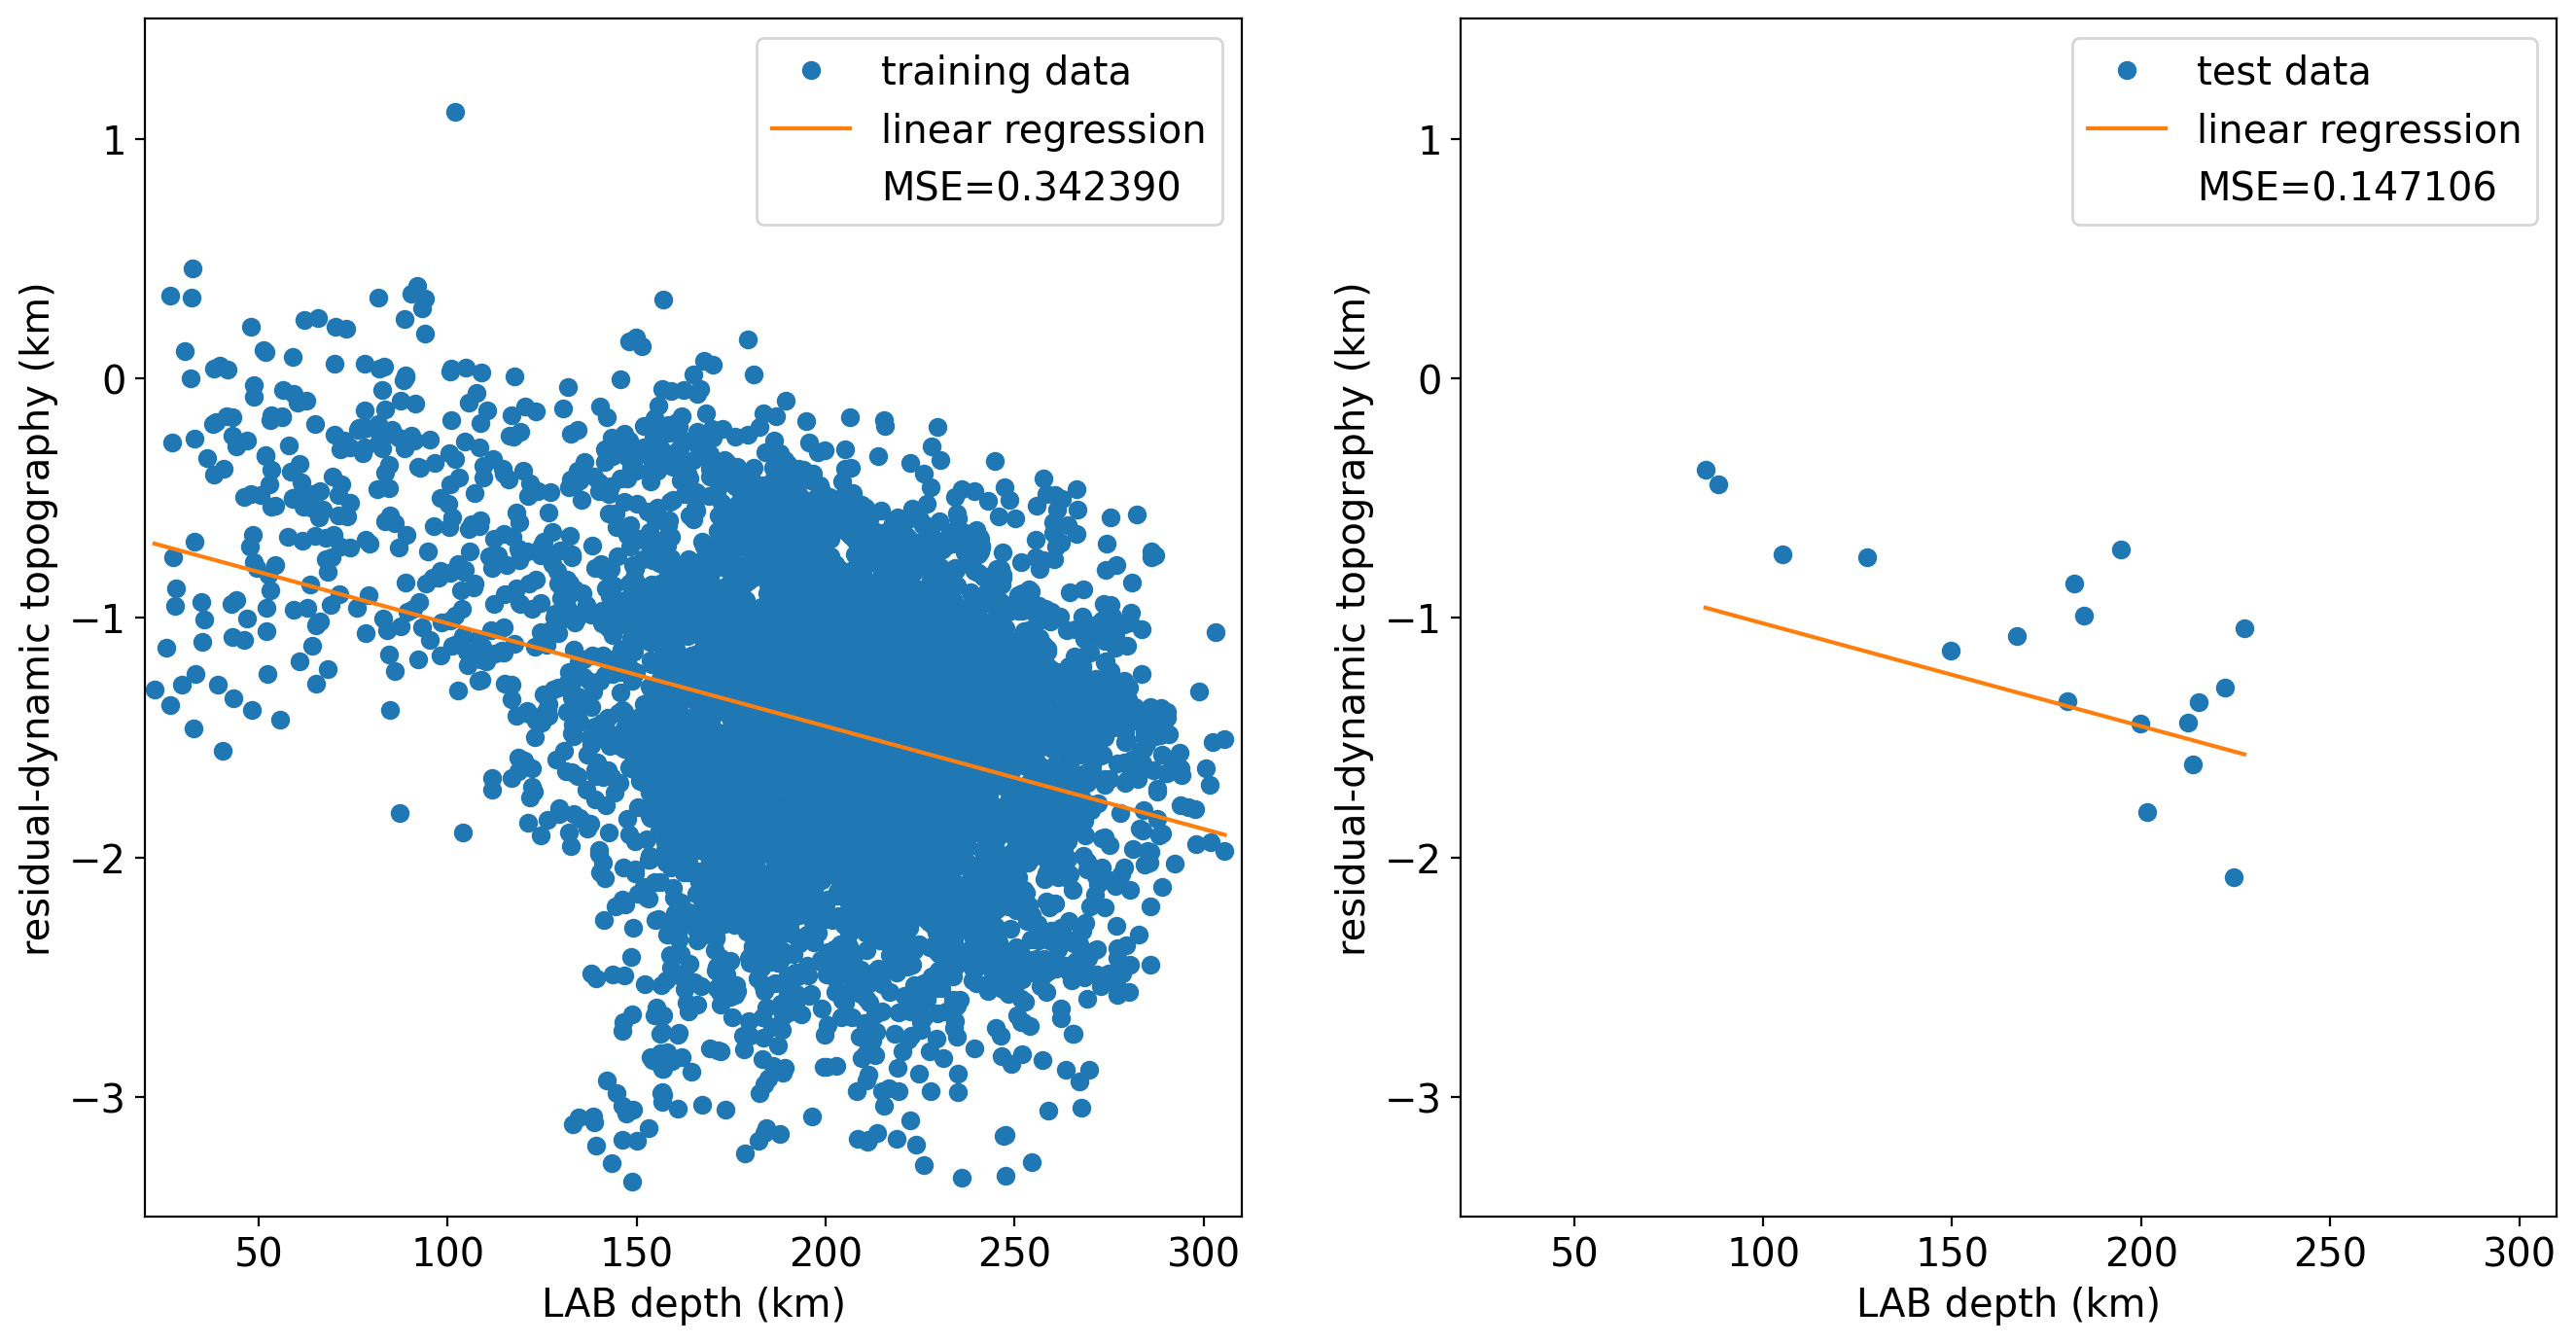

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# fit the data and obtain a prediction topohat
reg = LinearRegression().fit(lab_train,topo_train)
topohat_train = reg.predict(lab_train)
print('slope='+str(reg.coef_))
print('intercept='+str(reg.intercept_))
print("Training MSE: %.6f" % mean_squared_error(topo_train, topohat_train))
topohat_test = reg.predict(lab_test)
print("Test MSE: %.6f" % mean_squared_error(topo_test, topohat_test))

fig, ax = plt.subplots(1,2,figsize=[16,8])
ax[0].plot(lab_train,topo_train,'o',label='training data')
ax[0].plot(lab_train,topohat_train,'-',label='linear regression')
ax[0].plot([],[],' ',label="MSE=%.6f" % mean_squared_error(topo_train,topohat_train))
ax[0].set_xlim(left=20,right=310)
ax[0].set_ylim(bottom=-3.5,top=1.5)
ax[0].set_xlabel('LAB depth (km)')
ax[0].set_ylabel('residual-dynamic topography (km)')
ax[0].legend()

ax[1].plot(lab_test,topo_test,'o',label='test data')
ax[1].plot(lab_test,topohat_test,'-',label='linear regression')
ax[1].plot([],[],' ',label="MSE=%.6f" % mean_squared_error(topo_test,topohat_test))
ax[1].set_xlim(left=20,right=310)
ax[1].set_ylim(bottom=-3.5,top=1.5)
ax[1].set_xlabel('LAB depth (km)')
ax[1].set_ylabel('residual-dynamic topography (km)')
ax[1].legend()

# Ridge regression
In the ridge regression, when the tuning parameter varies from 0.1 to 1000, the MSE for both training data and test data are similar to simple linear regression.

slope=[-0.00429147]
intercept=[-0.59347467]
Training MSE: 0.342390
Test MSE: 0.147106


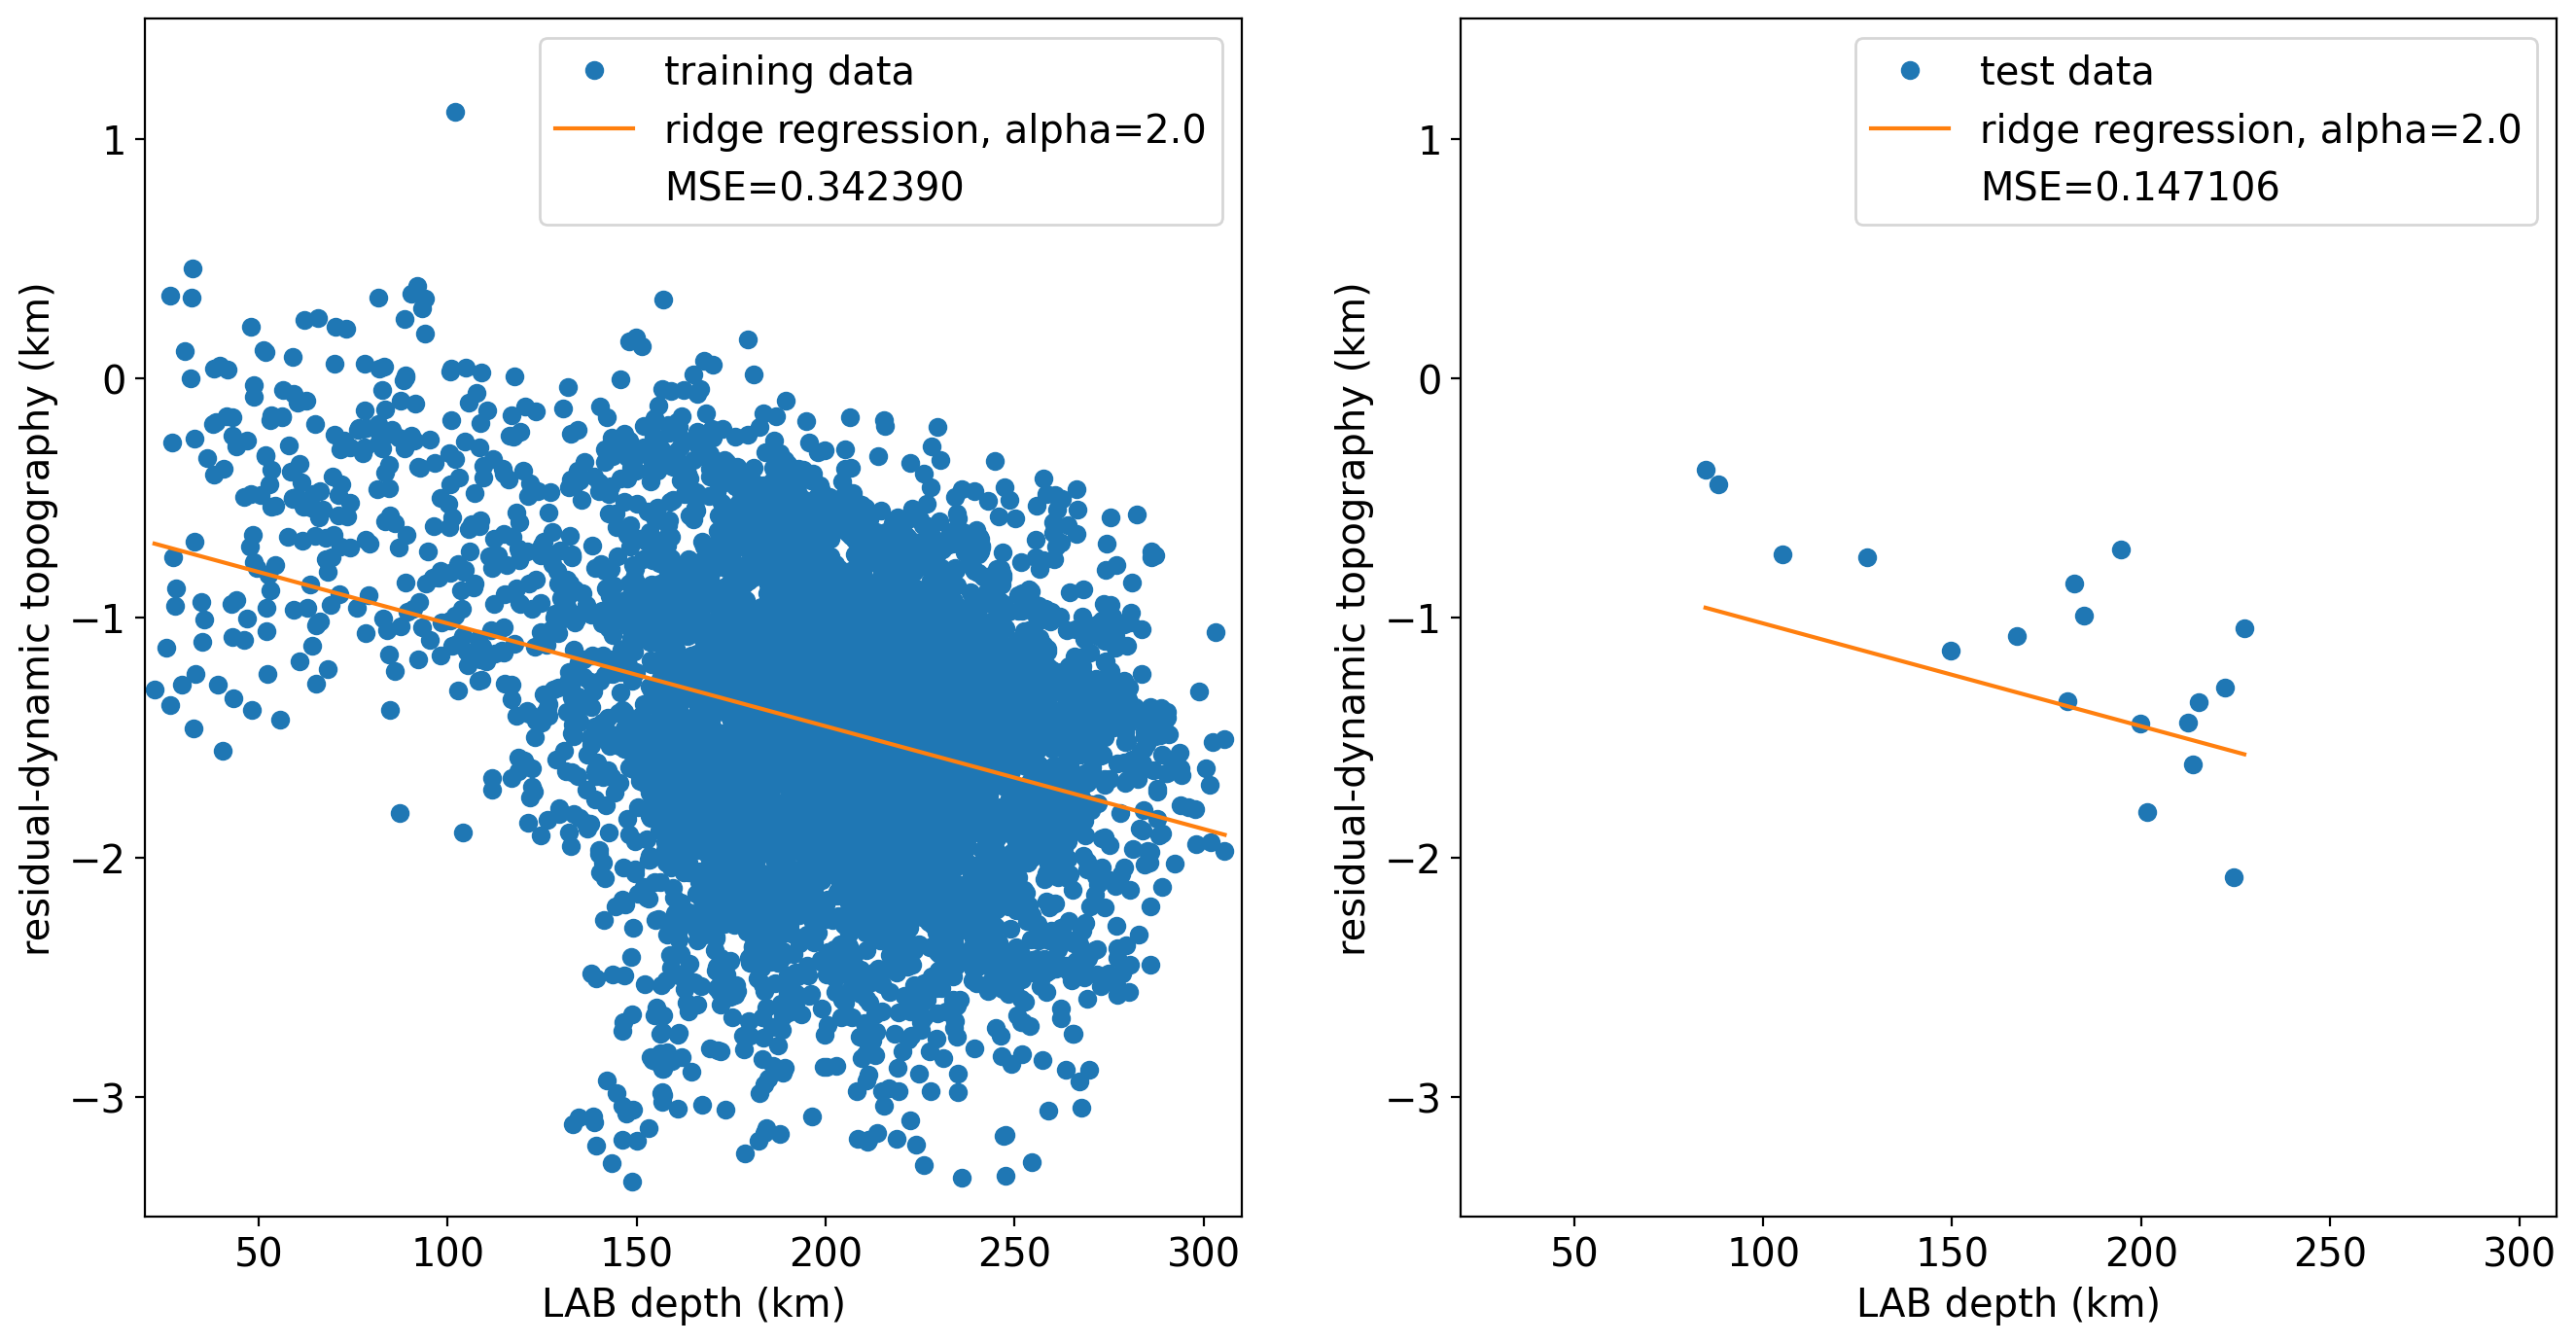

In [5]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# fit the data and obtain a prediction topohat
alpha=2
reg = Ridge(alpha).fit(lab_train,topo_train)
topohat_train = reg.predict(lab_train)
print('slope='+str(reg.coef_))
print('intercept='+str(reg.intercept_))
print("Training MSE: %.6f" % mean_squared_error(topo_train, topohat_train))
topohat_test = reg.predict(lab_test)
print("Test MSE: %.6f" % mean_squared_error(topo_test, topohat_test))

fig, ax = plt.subplots(1,2,figsize=[16,8])
ax[0].plot(lab_train,topo_train,'o',label='training data')
ax[0].plot(lab_train,topohat_train,'-',label='ridge regression, alpha=%.1f' %(alpha))
ax[0].plot([],[],' ',label="MSE=%.6f" % mean_squared_error(topo_train,topohat_train))
ax[0].set_xlim(left=20,right=310)
ax[0].set_ylim(bottom=-3.5,top=1.5)
ax[0].set_xlabel('LAB depth (km)')
ax[0].set_ylabel('residual-dynamic topography (km)')
ax[0].legend();

ax[1].plot(lab_test,topo_test,'o',label='test data')
ax[1].plot(lab_test,topohat_test,'-',label='ridge regression, alpha=%.1f' %(alpha))
ax[1].plot([],[],' ',label="MSE=%.6f" % mean_squared_error(topo_test,topohat_test))
ax[1].set_xlim(left=20,right=310)
ax[1].set_ylim(bottom=-3.5,top=1.5)
ax[1].set_xlabel('LAB depth (km)')
ax[1].set_ylabel('residual-dynamic topography (km)')
ax[1].legend();

# The lasso
In the lasso, when the tuning parameter increases from 0.1 to 10, the MSE for both training data and test data increaces. When the tuning parameter is larger than 10, the model merely changes.

slope=[-0.00424354]
intercept=[-0.60305825]
Training MSE: 0.342395
Test MSE: 0.148214


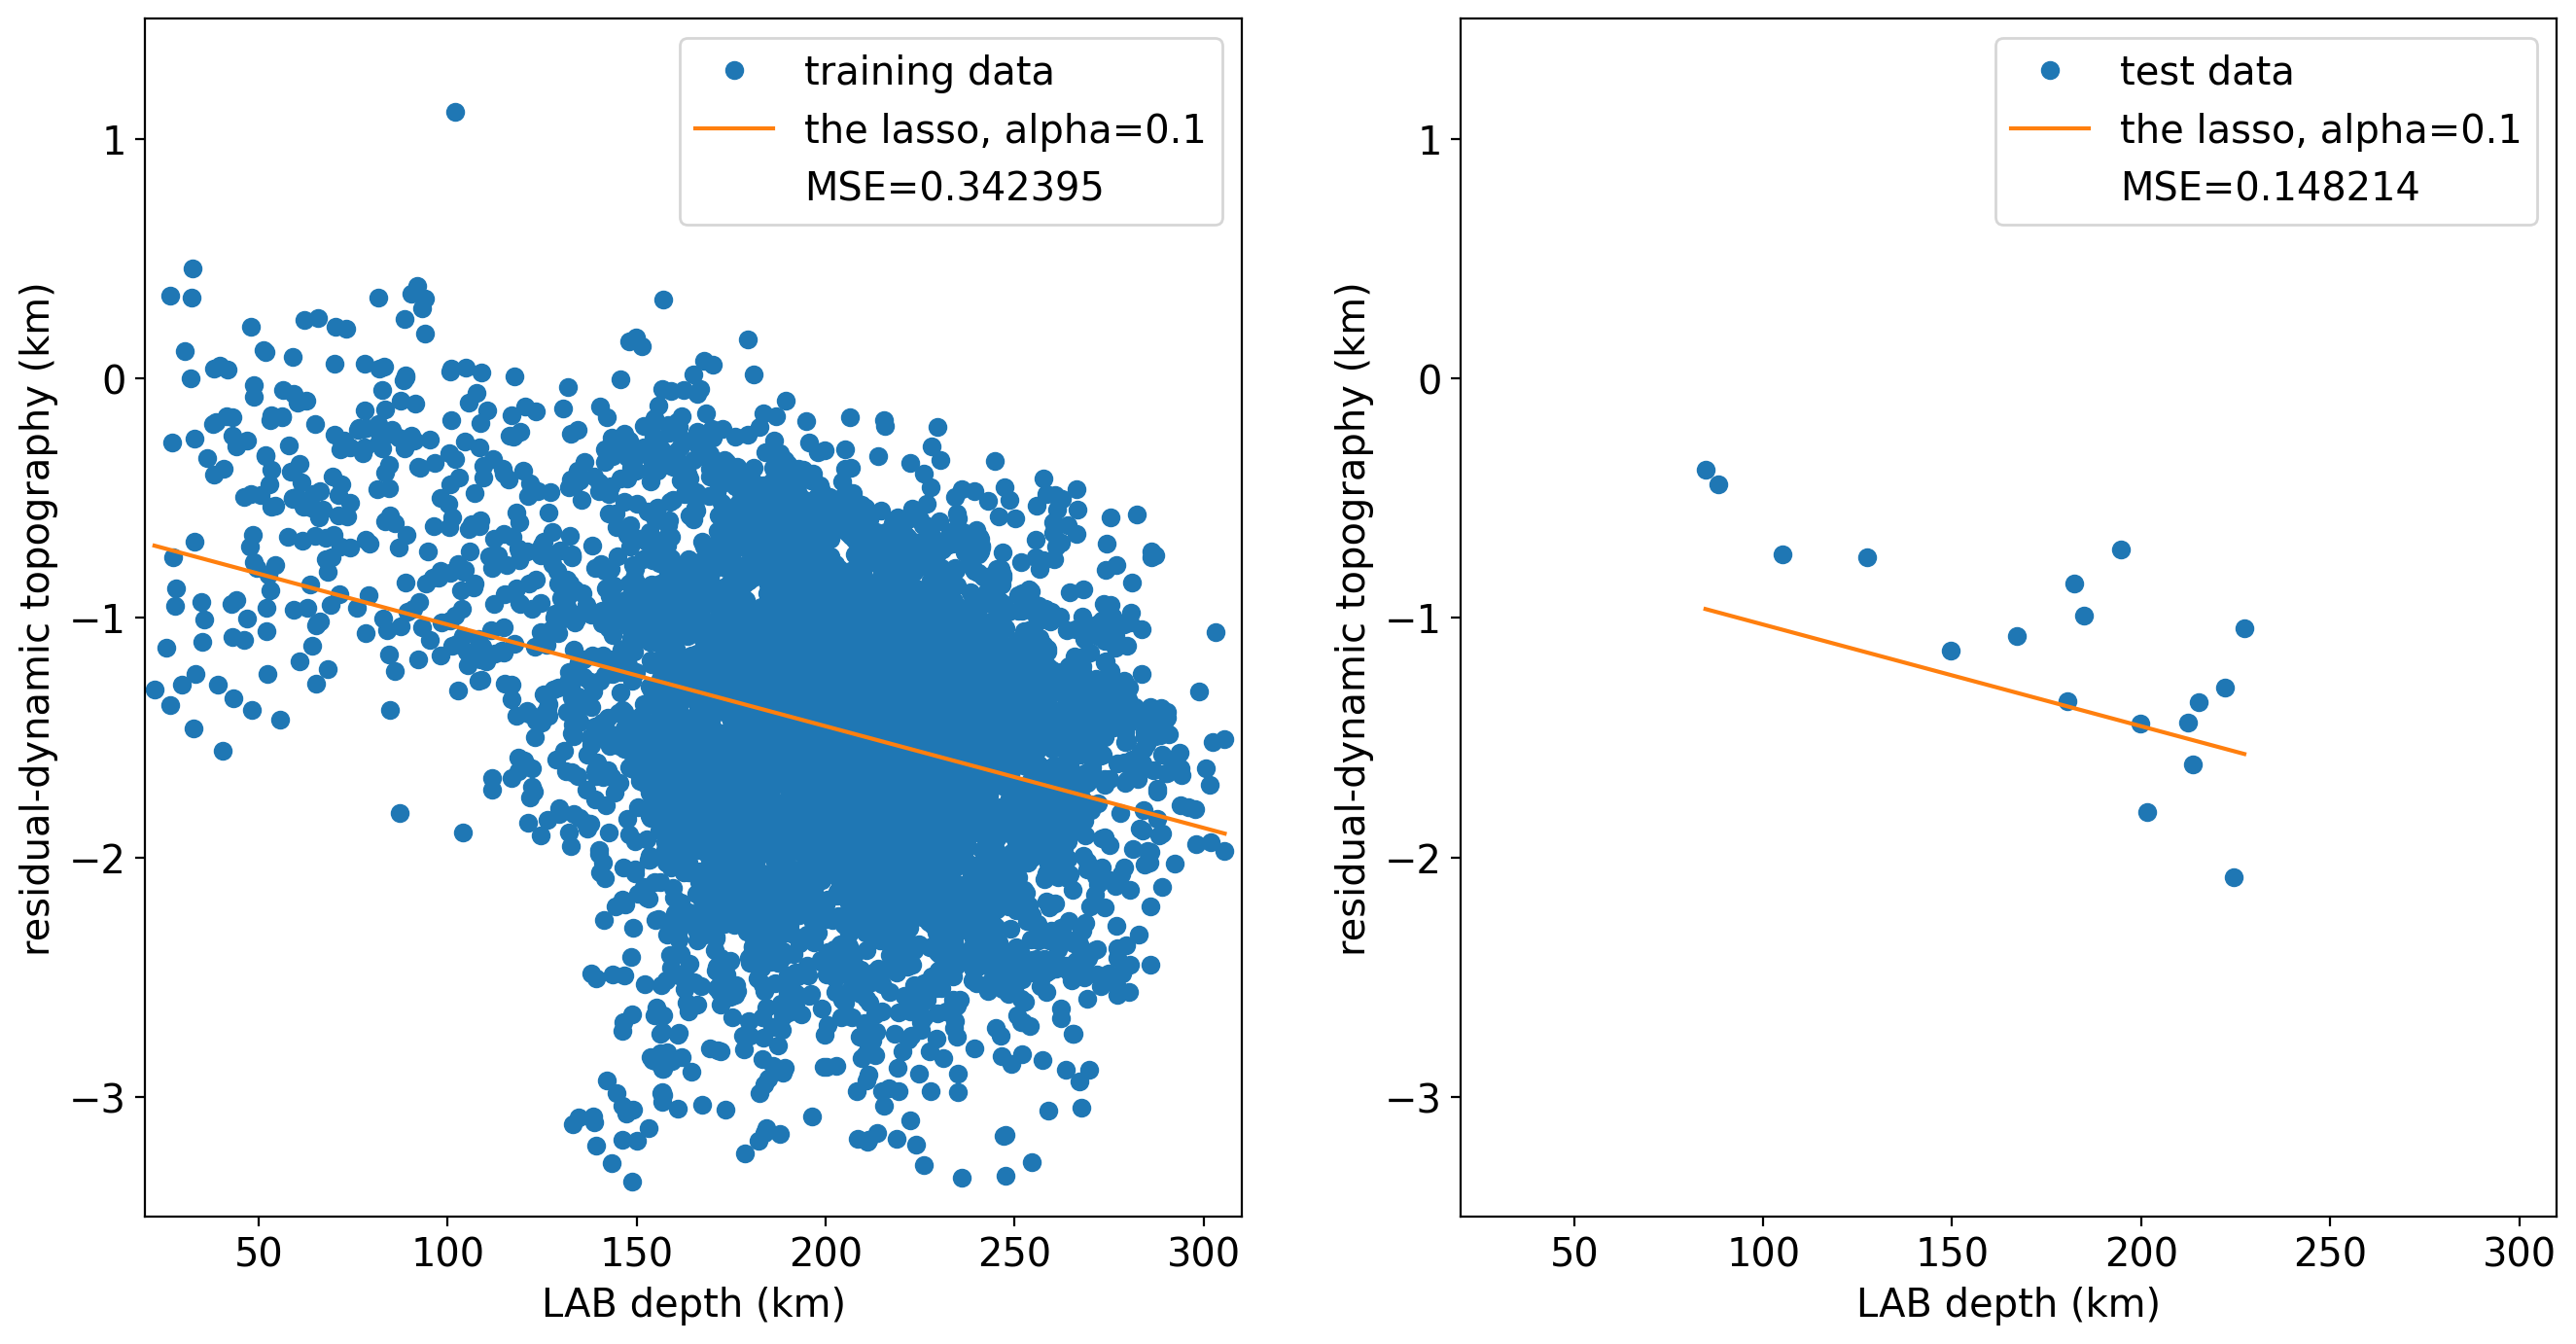

In [6]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# fit the data and obtain a prediction topohat
alpha=0.1
reg = Lasso(alpha).fit(lab_train,topo_train)
topohat_train = reg.predict(lab_train)
print('slope='+str(reg.coef_))
print('intercept='+str(reg.intercept_))
print("Training MSE: %.6f" % mean_squared_error(topo_train, topohat_train))
topohat_test = reg.predict(lab_test)
print("Test MSE: %.6f" % mean_squared_error(topo_test, topohat_test))

fig, ax = plt.subplots(1,2,figsize=[16,8])
ax[0].plot(lab_train,topo_train,'o',label='training data')
ax[0].plot(lab_train,topohat_train,'-',label='the lasso, alpha=%.1f' %(alpha))
ax[0].plot([],[],' ',label="MSE=%.6f" % mean_squared_error(topo_train,topohat_train))
ax[0].set_xlim(left=20,right=310)
ax[0].set_ylim(bottom=-3.5,top=1.5)
ax[0].set_xlabel('LAB depth (km)')
ax[0].set_ylabel('residual-dynamic topography (km)')
ax[0].legend();

ax[1].plot(lab_test,topo_test,'o',label='test data')
ax[1].plot(lab_test,topohat_test,'-',label='the lasso, alpha=%.1f' %(alpha))
ax[1].plot([],[],' ',label="MSE=%.6f" % mean_squared_error(topo_test,topohat_test))
ax[1].set_xlim(left=20,right=310)
ax[1].set_ylim(bottom=-3.5,top=1.5)
ax[1].set_xlabel('LAB depth (km)')
ax[1].set_ylabel('residual-dynamic topography (km)')
ax[1].legend();

# Polynomial regression
Polynomial regression models with degree 2 to 10 are applied. When the degree increases, the MSE for both training data and test data decreases. However, from physical side, the slope of the fitting curve should be negative within the LAB depth range, so the degree should not be larger than 3. Higher degree leads to overfitting for the data.

Training MSE: 0.332646
Test MSE: 0.135776


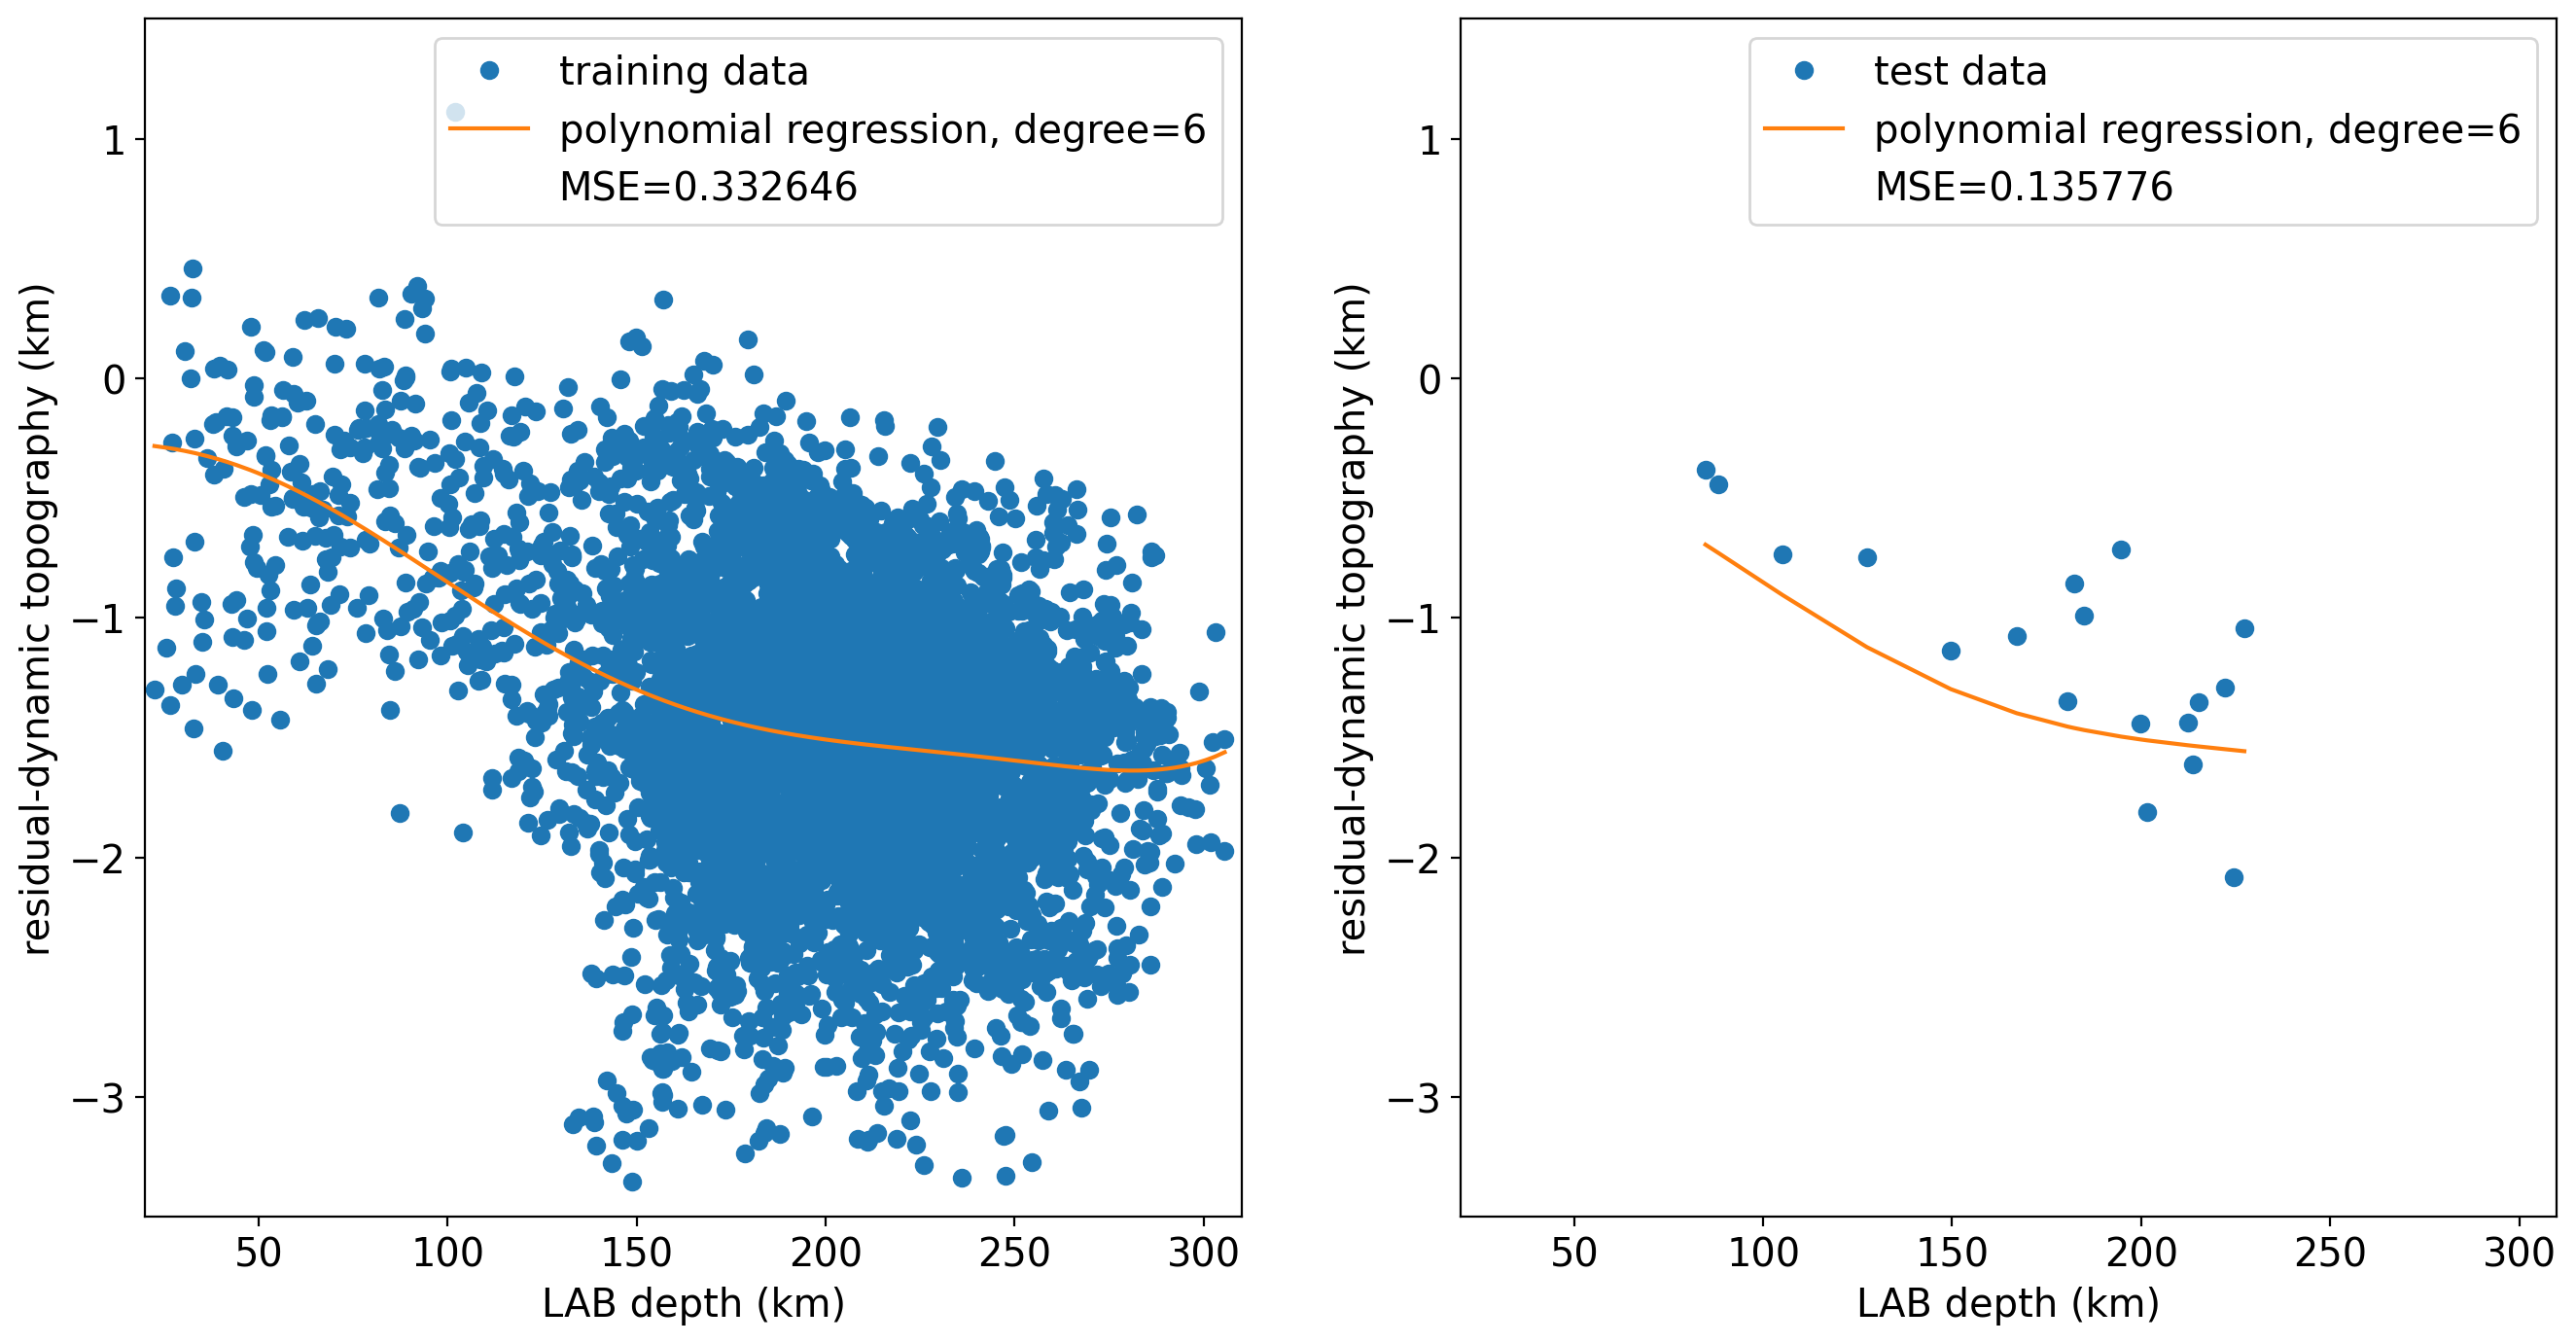

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# fit the data and obtain a prediction topohat
degree = 6
reg = make_pipeline(PolynomialFeatures(degree),LinearRegression())
reg.fit(lab_train,topo_train)
topohat_train = reg.predict(lab_train)
print("Training MSE: %.6f" % mean_squared_error(topo_train, topohat_train))
topohat_test = reg.predict(lab_test)
print("Test MSE: %.6f" % mean_squared_error(topo_test, topohat_test))

fig, ax = plt.subplots(1,2,figsize=[16,8])
ax[0].plot(lab_train,topo_train,'o',label='training data')
ax[0].plot(lab_train,topohat_train,'-',label='polynomial regression, degree=%d' %(degree))
ax[0].plot([],[],' ',label="MSE=%.6f" % mean_squared_error(topo_train,topohat_train))
ax[0].set_xlim(left=20,right=310)
ax[0].set_ylim(bottom=-3.5,top=1.5)
ax[0].set_xlabel('LAB depth (km)')
ax[0].set_ylabel('residual-dynamic topography (km)')
ax[0].legend();

ax[1].plot(lab_test,topo_test,'o',label='test data')
ax[1].plot(lab_test,topohat_test,'-',label='polynomial regression, degree=%d' %(degree))
ax[1].plot([],[],' ',label="MSE=%.6f" % mean_squared_error(topo_test,topohat_test))
ax[1].set_xlim(left=20,right=310)
ax[1].set_ylim(bottom=-3.5,top=1.5)
ax[1].set_xlabel('LAB depth (km)')
ax[1].set_ylabel('residual-dynamic topography (km)')
ax[1].legend();

# Piecewise linear regression
Two methods are applied to do the piecewise linear regression. The first one is DecisionTreeRegressor and the second one is KBinsDiscretizer. When the numbers of bins are the same in these two methods, they basically yield the same regression model. When the number of bins increases from 2 to 10, the MSE for both training data and test data only changes in a small range.

In [ ]:
from mlinsights.mlmodel import PiecewiseRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

reg = PiecewiseRegressor(verbose=True,binner=DecisionTreeRegressor(min_samples_leaf=1000))
reg.fit(np.array(lab_train), np.array(topo_train))
topohat_train = reg.predict(lab_train)
print("Training MSE: %.6f" % mean_squared_error(topo_train, topohat_train))
topohat_test = reg.predict(lab_test)
print("Test MSE: %.6f" % mean_squared_error(topo_test, topohat_test))

fig, ax = plt.subplots(1,2,figsize=[16,8])
ax[0].plot(lab_train,topo_train,'o',label='training data')
ax[0].plot(lab_train,topohat_train,'-',label='piecewise linear regression')
ax[0].plot([],[],' ',label="MSE=%.6f" % mean_squared_error(topo_train,topohat_train))
ax[0].set_xlim(left=20,right=310)
ax[0].set_ylim(bottom=-3.5,top=1.5)
ax[0].set_xlabel('LAB depth (km)')
ax[0].set_ylabel('residual-dynamic topography (km)')
ax[0].legend()

ax[1].plot(lab_test,topo_test,'o',label='test data')
ax[1].plot(lab_test,topohat_test,'-',label='piecewise linear regression')
ax[1].plot([],[],' ',label="MSE=%.6f" % mean_squared_error(topo_test,topohat_test))
ax[1].set_xlim(left=20,right=310)
ax[1].set_ylim(bottom=-3.5,top=1.5)
ax[1].set_xlabel('LAB depth (km)')
ax[1].set_ylabel('residual-dynamic topography (km)')
ax[1].legend()

In [ ]:
from mlinsights.mlmodel import PiecewiseRegressor
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import mean_squared_error

topo = pd.DataFrame(data_train['topography'])
lab = pd.DataFrame(data_train['LAB'])

reg = PiecewiseRegressor(verbose=True, binner=KBinsDiscretizer(n_bins=2))
reg.fit(np.array(lab_train), np.array(topo_train))
topohat_train = reg.predict(lab_train)
print("Training MSE: %.6f" % mean_squared_error(topo_train, topohat_train))
topohat_test = reg.predict(lab_test)
print("Test MSE: %.6f" % mean_squared_error(topo_test, topohat_test))

fig, ax = plt.subplots(1,2,figsize=[16,8])
ax[0].plot(lab_train,topo_train,'o',label='training data')
ax[0].plot(lab_train,topohat_train,'-',label='piecewise linear regression')
ax[0].plot([],[],' ',label="MSE=%.6f" % mean_squared_error(topo_train,topohat_train))
ax[0].set_xlim(left=20,right=310)
ax[0].set_ylim(bottom=-3.5,top=1.5)
ax[0].set_xlabel('LAB depth (km)')
ax[0].set_ylabel('residual-dynamic topography (km)')
ax[0].legend()

ax[1].plot(lab_test,topo_test,'o',label='test data')
ax[1].plot(lab_test,topohat_test,'-',label='piecewise linear regression')
ax[1].plot([],[],' ',label="MSE=%.6f" % mean_squared_error(topo_test,topohat_test))
ax[1].set_xlim(left=20,right=310)
ax[1].set_ylim(bottom=-3.5,top=1.5)
ax[1].set_xlabel('LAB depth (km)')
ax[1].set_ylabel('residual-dynamic topography (km)')
ax[1].legend()

# Piecewise linear regression
Two methods are applied to do the piecewise linear regression as well, DecisionTreeRegressor and KBinsDiscretizer.

Training MSE: 0.332099
Test MSE: 0.137718


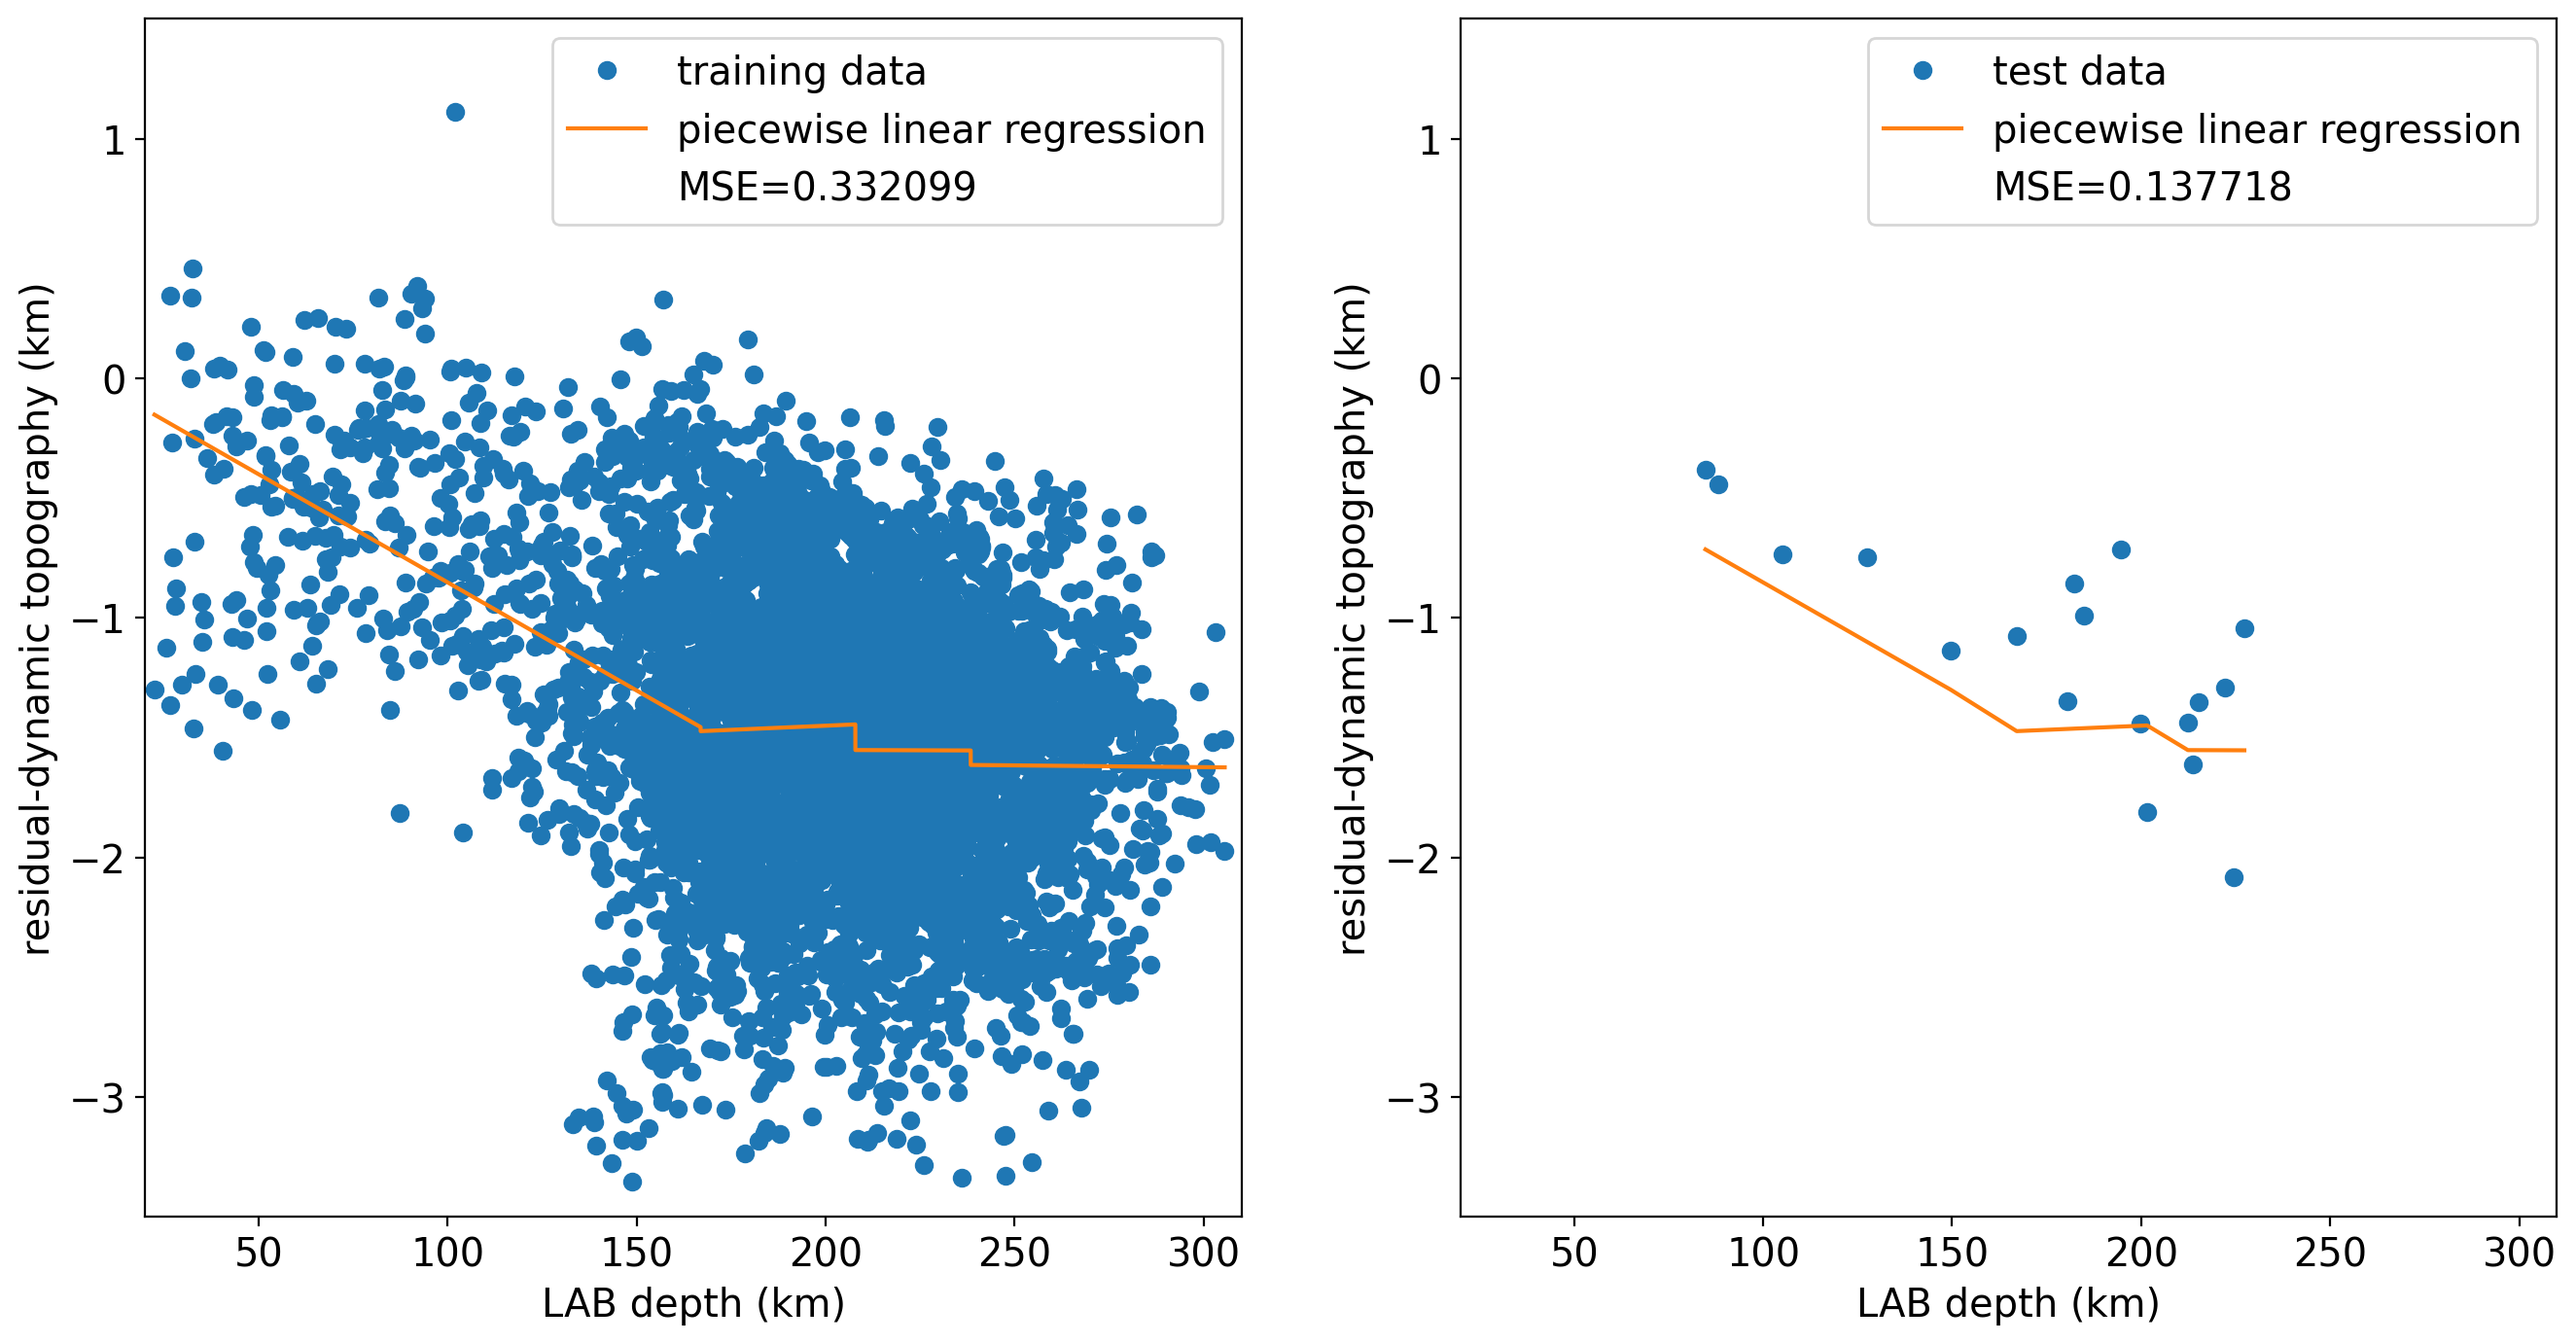

In [13]:
# --- Piecewise linear regression using DecisionTreeRegressor as binner ---
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def piecewise_linear_tree(X, y, min_samples_leaf=1000):
    # Fit tree to find breakpoints
    tree = DecisionTreeRegressor(min_samples_leaf=min_samples_leaf)
    tree.fit(X, y)
    # Get thresholds (breakpoints)
    thresholds = np.sort(tree.tree_.threshold[tree.tree_.threshold > -2])
    # Assign segment labels
    segments = np.digitize(X.flatten(), thresholds)
    preds = np.zeros_like(y, dtype=float)
    models = []
    for seg in range(len(thresholds) + 1):
        mask = segments == seg
        lr = LinearRegression()
        lr.fit(X[mask], y[mask])
        preds[mask] = lr.predict(X[mask])
        models.append(lr)
    return preds, thresholds, models

topohat_train, thresholds, models = piecewise_linear_tree(np.array(lab_train), np.array(topo_train), min_samples_leaf=1000)
print("Training MSE: %.6f" % mean_squared_error(topo_train, topohat_train))
# Predict for test data
segments_test = np.digitize(np.array(lab_test).flatten(), thresholds)
topohat_test = np.zeros_like(np.array(topo_test), dtype=float)
for seg in range(len(thresholds) + 1):
    mask = segments_test == seg
    if np.any(mask):
        topohat_test[mask] = models[seg].predict(np.array(lab_test)[mask])
print("Test MSE: %.6f" % mean_squared_error(topo_test, topohat_test))

fig, ax = plt.subplots(1,2,figsize=[16,8])
ax[0].plot(lab_train,topo_train,'o',label='training data')
ax[0].plot(lab_train,topohat_train,'-',label='piecewise linear regression')
ax[0].plot([],[],' ',label="MSE=%.6f" % mean_squared_error(topo_train,topohat_train))
ax[0].set_xlim(left=20,right=310)
ax[0].set_ylim(bottom=-3.5,top=1.5)
ax[0].set_xlabel('LAB depth (km)')
ax[0].set_ylabel('residual-dynamic topography (km)')
ax[0].legend()

ax[1].plot(lab_test,topo_test,'o',label='test data')
ax[1].plot(lab_test,topohat_test,'-',label='piecewise linear regression')
ax[1].plot([],[],' ',label="MSE=%.6f" % mean_squared_error(topo_test,topohat_test))
ax[1].set_xlim(left=20,right=310)
ax[1].set_ylim(bottom=-3.5,top=1.5)
ax[1].set_xlabel('LAB depth (km)')
ax[1].set_ylabel('residual-dynamic topography (km)')
ax[1].legend()

Training MSE: 0.332606
Test MSE: 0.135407


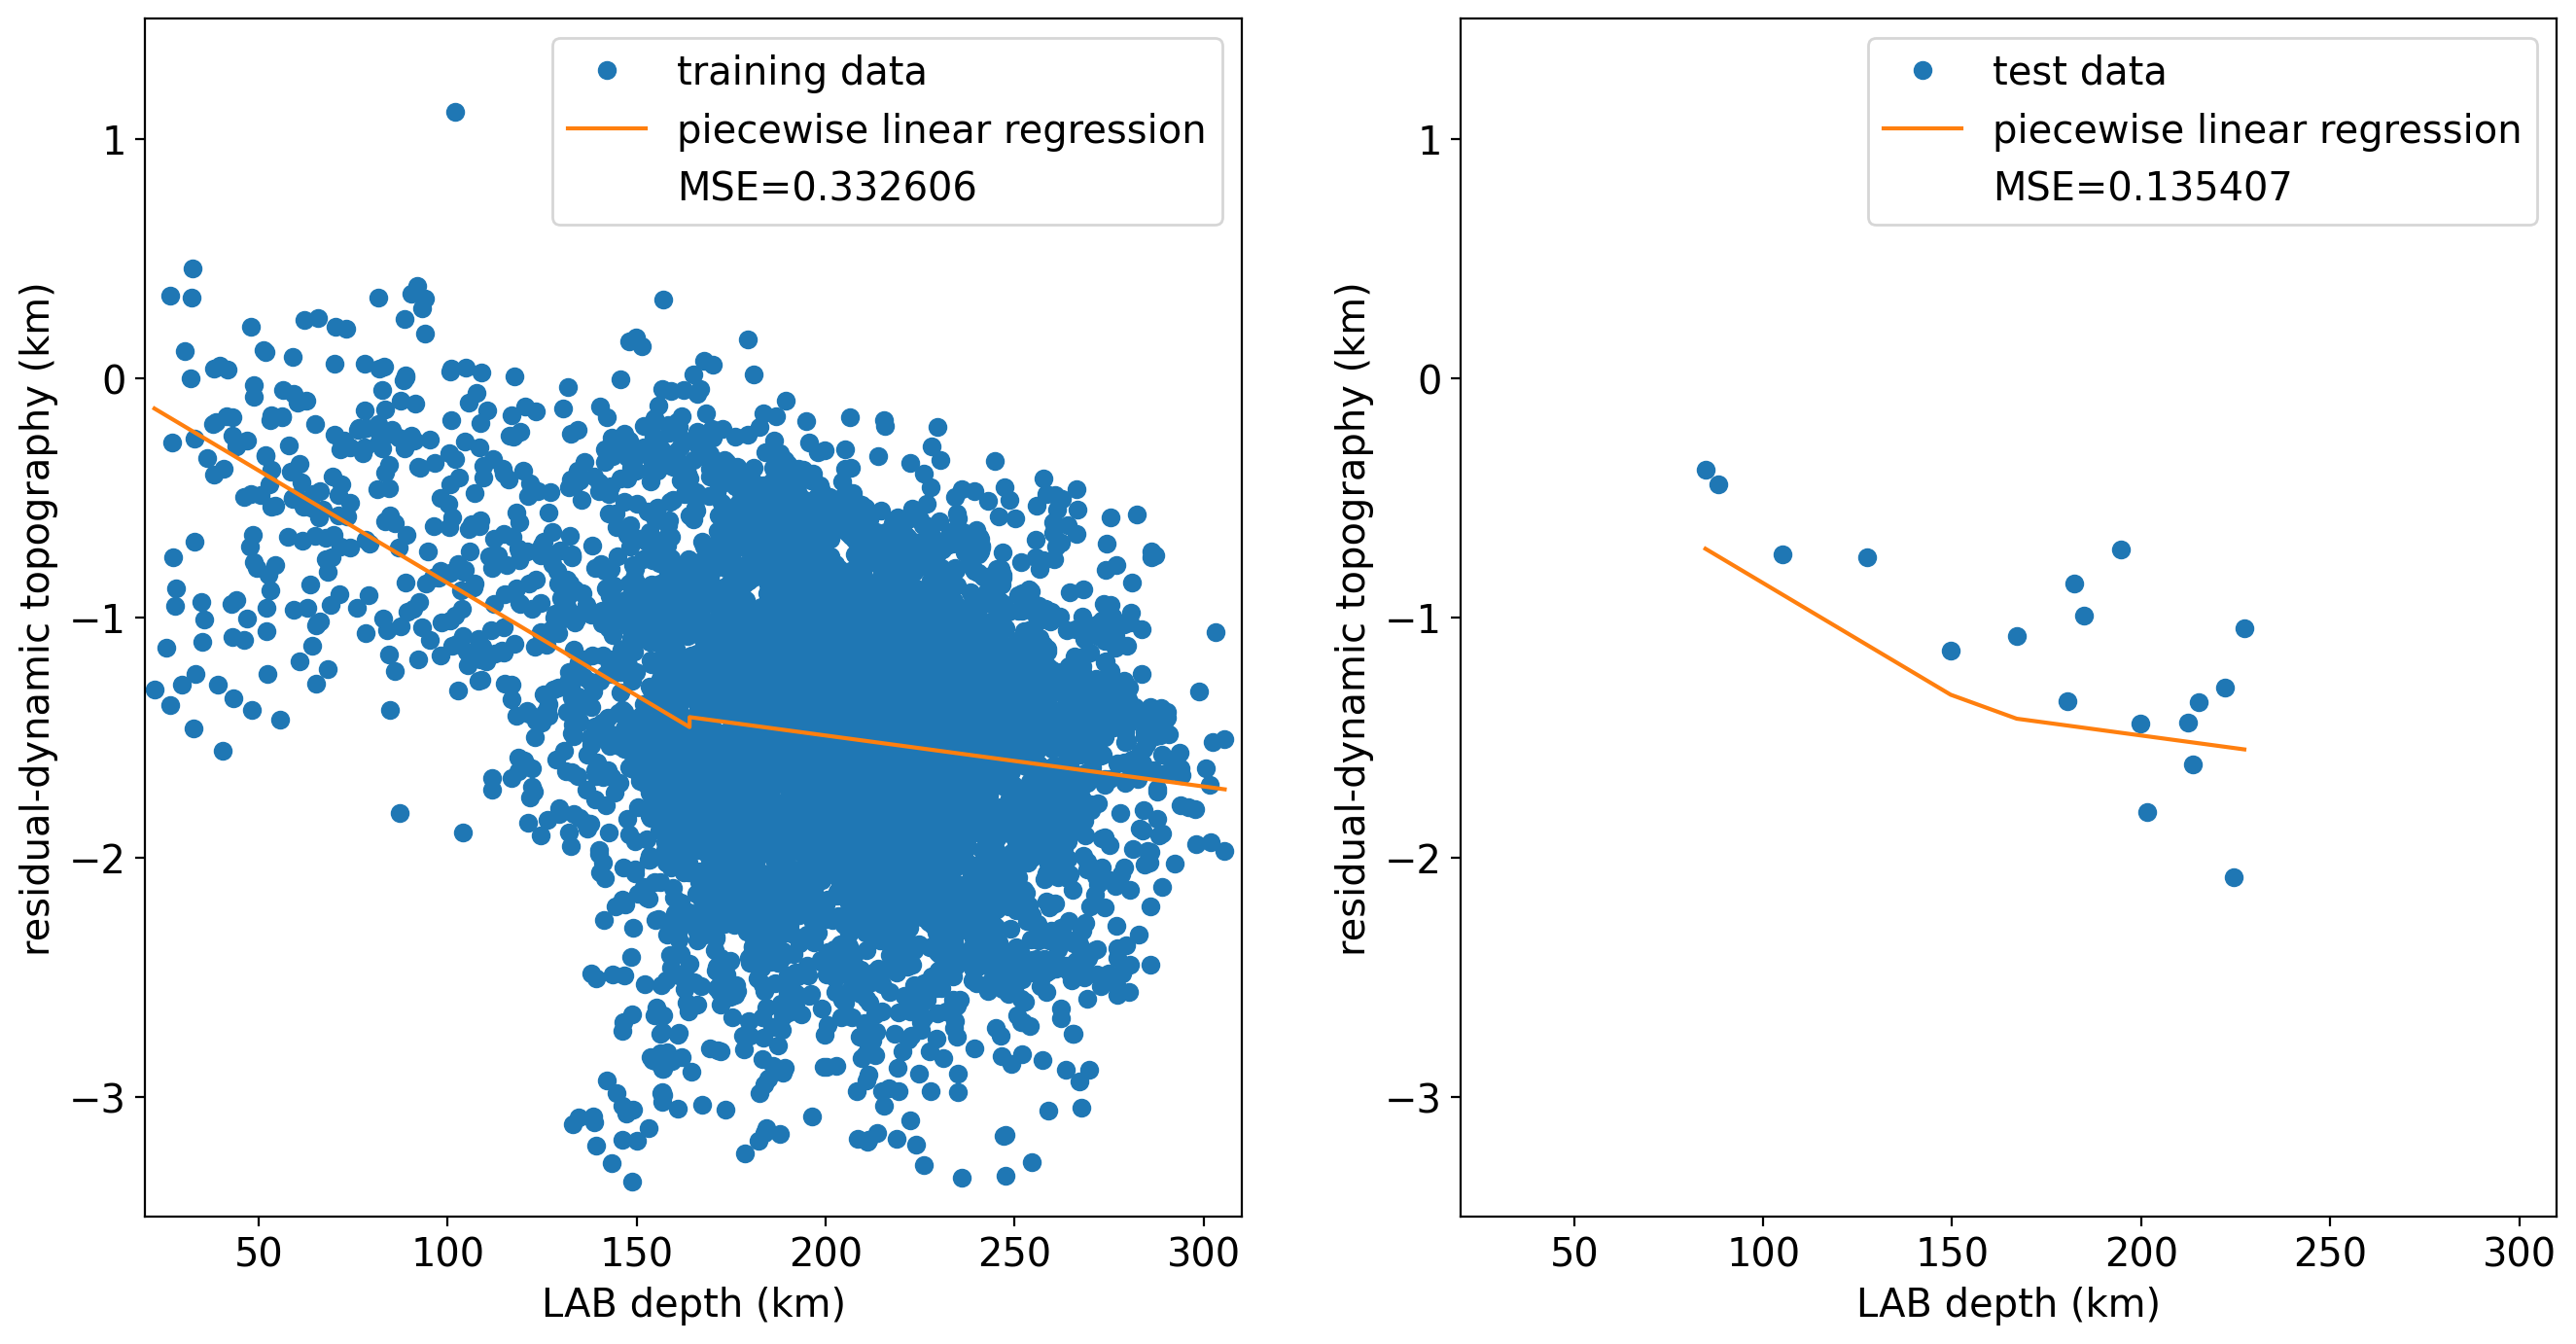

In [9]:
# --- Piecewise linear regression using KBinsDiscretizer as binner ---
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def piecewise_linear_bins(X, y, n_bins=2):
    binner = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
    bins = binner.fit_transform(X)
    preds = np.zeros_like(y, dtype=float)
    models = []
    for bin_id in range(n_bins):
        mask = bins.flatten() == bin_id
        lr = LinearRegression()
        lr.fit(X[mask], y[mask])
        preds[mask] = lr.predict(X[mask])
        models.append(lr)
    return preds, binner, models

topohat_train, binner, models = piecewise_linear_bins(np.array(lab_train), np.array(topo_train), n_bins=2)
print("Training MSE: %.6f" % mean_squared_error(topo_train, topohat_train))
# Predict for test data
bins_test = binner.transform(np.array(lab_test))
topohat_test = np.zeros_like(np.array(topo_test), dtype=float)
for bin_id in range(2):
    mask = bins_test.flatten() == bin_id
    if np.any(mask):
        topohat_test[mask] = models[bin_id].predict(np.array(lab_test)[mask])
print("Test MSE: %.6f" % mean_squared_error(topo_test, topohat_test))

fig, ax = plt.subplots(1,2,figsize=[16,8])
ax[0].plot(lab_train,topo_train,'o',label='training data')
ax[0].plot(lab_train,topohat_train,'-',label='piecewise linear regression')
ax[0].plot([],[],' ',label="MSE=%.6f" % mean_squared_error(topo_train,topohat_train))
ax[0].set_xlim(left=20,right=310)
ax[0].set_ylim(bottom=-3.5,top=1.5)
ax[0].set_xlabel('LAB depth (km)')
ax[0].set_ylabel('residual-dynamic topography (km)')
ax[0].legend()

ax[1].plot(lab_test,topo_test,'o',label='test data')
ax[1].plot(lab_test,topohat_test,'-',label='piecewise linear regression')
ax[1].plot([],[],' ',label="MSE=%.6f" % mean_squared_error(topo_test,topohat_test))
ax[1].set_xlim(left=20,right=310)
ax[1].set_ylim(bottom=-3.5,top=1.5)
ax[1].set_xlabel('LAB depth (km)')
ax[1].set_ylabel('residual-dynamic topography (km)')
ax[1].legend()